In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_csv("card_transdata.csv")

In [6]:
df=df.head(10000)

In [7]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [8]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
9995,4.225100,2.678220,0.556858,1.0,0.0,0.0,1.0,0.0
9996,3.614858,0.431593,0.061778,1.0,0.0,0.0,1.0,0.0
9997,10.131863,10.262508,2.818090,1.0,0.0,0.0,1.0,0.0
9998,16.306236,0.014054,1.904495,1.0,0.0,0.0,1.0,0.0
9999,1.292596,0.415847,1.332285,0.0,1.0,0.0,1.0,0.0


In [11]:
df.info

<bound method DataFrame.info of       distance_from_home  distance_from_last_transaction  \
0              57.877857                        0.311140   
1              10.829943                        0.175592   
2               5.091079                        0.805153   
3               2.247564                        5.600044   
4              44.190936                        0.566486   
...                  ...                             ...   
9995            4.225100                        2.678220   
9996            3.614858                        0.431593   
9997           10.131863                       10.262508   
9998           16.306236                        0.014054   
9999            1.292596                        0.415847   

      ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                           1.945940              1.0        1.0   
1                           1.294219              1.0        0.0   
2                           0.427715       

In [16]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [17]:
df.shape

(10000, 8)

In [18]:
df.isnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False


In [21]:
df.nunique()

distance_from_home                10000
distance_from_last_transaction    10000
ratio_to_median_purchase_price    10000
repeat_retailer                       2
used_chip                             2
used_pin_number                       2
online_order                          2
fraud                                 2
dtype: int64

In [23]:
x=df.distance_from_home
y=df.distance_from_last_transaction

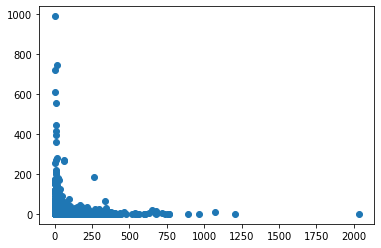

In [24]:
plt.scatter(x,y)

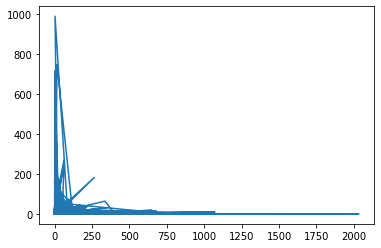

In [28]:
plt.plot(x,y)

(array([9.958e+03, 2.500e+01, 8.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([9.30476839e-04, 9.90078690e+01, 1.98014807e+02, 2.97021746e+02,
        3.96028684e+02, 4.95035623e+02, 5.94042561e+02, 6.93049500e+02,
        7.92056438e+02, 8.91063377e+02, 9.90070315e+02]),
 <a list of 10 Patch objects>)

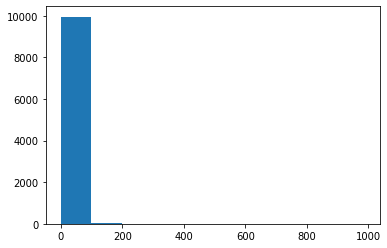

In [30]:
plt.hist(y)

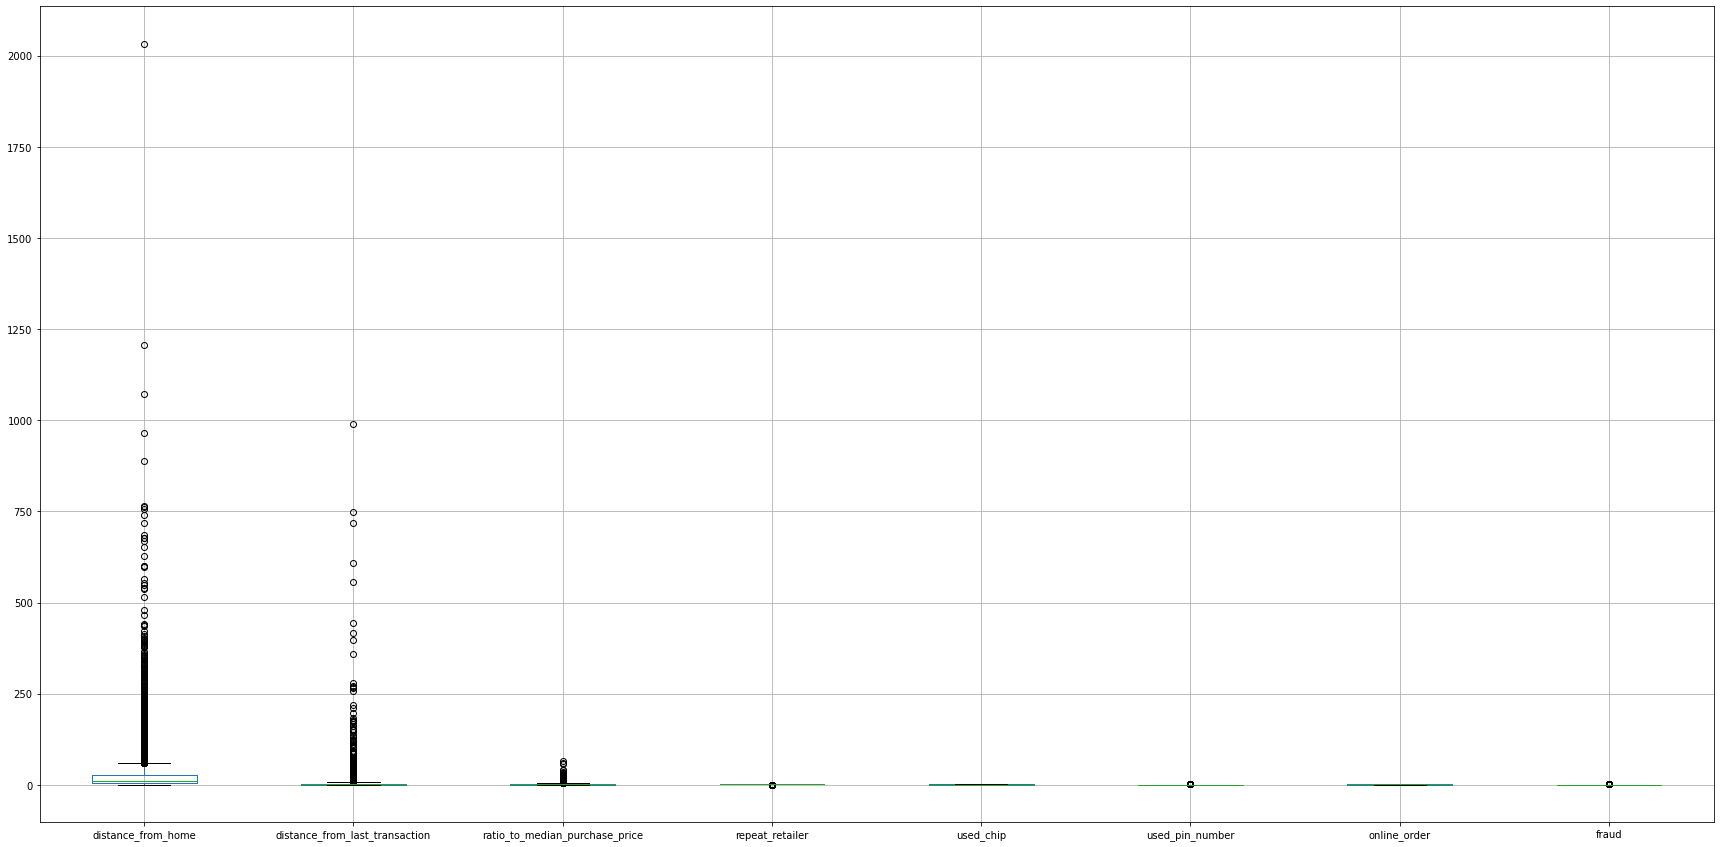

In [37]:
df.boxplot(figsize=(30,15))

In [43]:
feature=df.drop('fraud',axis=1)
target=df.fraud

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(feature,target,test_size=0.2,random_state=0)

In [58]:
a=StandardScaler()
X_train=a.fit_transform(X_train)
X_test=a.transform(X_test)

In [59]:
classfier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classfier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [60]:
Y_pred=classfier.predict(X_test)

In [61]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[1841,    1],
       [   0,  158]])

In [62]:
accuracy_score(Y_test,Y_pred)

0.9995

In [63]:
from sklearn.naive_bayes import GaussianNB
clf1=GaussianNB()
clf1.fit(X_train,Y_train)
Y_pred=clf1.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[1818,   24],
       [  70,   88]])

In [64]:
accuracy_score(Y_test,Y_pred)

0.953